<a href="https://colab.research.google.com/github/vatsan108/image-encryption-app/blob/master/malware_gray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
import os as os
import matplotlib.pyplot as plt
import collections
from collections import Counter
from scipy.fftpack import dct
from skimage.io import imread
from skimage.color import rgb2gray
from nltk.util import ngrams
import networkx as net
import numpy as np
from numpy import random

In [ ]:
DATA_SOURCE = '/content/drive/MyDrive/grayimages'
SPARSE_LOC = '/content/drive/MyDrive/Malware_Detection_Project/BIG_bigram_dct/sparse'
DCT_LOC = '/content/drive/MyDrive/grayimages'
TRAIN_LABEL = '/content/drive/MyDrive/malware/ms_dataset/2.csv'

In [ ]:
from PIL import Image
import numpy as np
import os as os
import matplotlib.pyplot as plt
import collections
from collections import Counter
from scipy.fftpack import dct
from skimage.io import imread
from skimage.color import rgb2gray
from nltk.util import ngrams
import networkx as net
import numpy as np
from numpy import random
import math
import pandas as pd
import cv2
from itertools import islice
from tqdm import tqdm

In [ ]:
%matplotlib inline
import re
import os
# def con_and_save(arr, name):
#   print('Processing ' + name)
#   if arr.shape[1] != 16: # not hex
#     assert(False)
#   b=int((arr.shape[0]*16)**(0.5))   
#   b=2**(int(np.log(b)/np.log(2))+1) 
#   a=int(arr.shape[0]*16/b)
#   arr=arr[:a*b//16,:]
#   arr=np.reshape(arr,(a,b))
#   im=Image.fromarray(np.uint8(arr))
#   im.save('/content/image/' + name + '.png', "PNG")
#   return im

# def wordvec(op):
  
def extractop(op,name):
    
    li = ['db', 'fdivrp', 'fstp', 'div', 'ja', 'pop', 'jnz', 'and', 'movsx', 'jnb', 'byte', 'eax', 'call', 'fstcw', 'CC', 'not', 'shl', 'setz', 'jns', 'imul', 'stmxcsr', 'jl', 'lea', 'jle', 'mov', 'xor', 'jz', 'mul', 'cmp', 'sar', 'movsd', 'fnclex', 'fldcw', 'edx', 'nop', 'offset', 'jg', 'ecx', 'leave', 'push', 'ebx', 'stosd', 'wait', 'fistp', 'esp', 'movzx', 'sub', 'sbb', 'fnstsw', 'align', 'inc', 'or', 'cdq', 'test', 'jb', 'esi', 'jbe', 'edi', 'jmp', 'fldpi', 'retn', 'dword', 'fldz', 'ldmxcsr', 'fld1', 'fld', 'setnle', 'fstsw', 'neg', 'rep', 'jge', 'setnz', 'shr', 'retf', 'dec', 'add', 'xchg', 'ror', 'rol', 'rtn']
    # op = list()
    with open(name,'r',encoding = "utf-8",errors="ignore") as fin:
        for i in fin:
            s = i.split(' ')
            for k in s:
                if k in li:
                  op.append(k)
    # print(op)
    return op   

def countbyte(name):      
  count = 0
  byte = list()
  # bytecount = 42*42 
  # print(bytecount)
  with open(name,'r') as fin:
        # while count<= bytecount*100:
          for line in fin:
            xx=line.split()
            for i in xx[1:]:
                  if count == (256*256):
                    break
                  elif i !='??':
                    byte.append(int(i,16))
                    
                    # print(byte.append(int(i,16)))
                  else:
                    byte.append(0)
                  count += 1
                 
  # print('byte len',len(byte))
  return byte


def pagetext(res_dct):
  with open("/content/asmgraph.txt",'w') as fout:
    for key,value in res_dct.items():
      fout.write(key+" "+value)
      fout.write("\n")
    fout.close()
  return fout   


def pagerank():
  FielName='/content/asmgraph.txt'
  Graphtype=net.DiGraph()  
  G = net.read_edgelist(
      FielName, 
      create_using=Graphtype,
      nodetype=str,
      data=(('weight',int),1)
  )     
  pr = net.pagerank(G, alpha=0.9,max_iter=1000 )  
  return pr

def pr_convert(op,pr):
  with open('pageopcode.txt', 'w+') as newfile:
   for i in op:
      if i in pr.keys():
        # newfile.write(line.replace(word,'%f'%value))
        newfile.write('%f'%pr.get(i))
        newfile.write(" ")

def page_list():
  pagelist = list()
  count = 0
  with open('pageopcode.txt','r') as file:
    for line in file:
          # for word, value in pr.items():
          for value in line.split():
            if(count == 80*80):
              break
            else:
              pagelist.append(value)
              count += 1

  # print(pagelist)
  # print(len(pagelist))
  return pagelist


def normalize(pagelist):
  # print(pagelist)
  page_len = len(pagelist)
  # print('pagelist len',page_len)
  page_len = int(math.sqrt(page_len))
  newarray = list()
  for i in range(page_len*page_len):
    newarray.append(i)

  pagearray = np.reshape(newarray,(page_len,page_len)).astype(np.float)
  # print(pagearray)
  try:
    pagearray = pagearray - pagearray.min()
    pagearray = pagearray/pagearray.max()
    pagearray = (pagearray*255).astype(np.uint8)
    # print(pagearray)
  except ValueError:
    pass  
  return pagearray

def mat_convert(array):
    if(len(array)) < 256:
      hori_array = np.zeros((256-len(array),len(array[0])),dtype = int)
      res_array = np.concatenate((array,hori_array),axis = 0)
    if(len(array[0])) < 256:
      vert_array = np.zeros((256,(256-len(array[0]))),dtype = int)
      res_array = np.concatenate((res_array,vert_array),axis = 1)
    # print('res_array',res_array)
    return res_array


def direct_conv():
      directory = '/content/drive/MyDrive/malware/ms_dataset/train_set'
      files = os.listdir(directory)
      #print(files[0].split("."))
      sorted_files = sorted(files)
      bytecount=0
      count = 0
      for i in range(0, len(sorted_files), 2):
           print(sorted_files[i])
           asmfile = directory+"/"+sorted_files[i]
           bytefile = directory+"/"+sorted_files[i+1] 
           op = list()
           opcode = extractop(op,asmfile)
          #  print('opcodelen',len(opcode))
           array = list()
           res_dct = {op[i]: op[i + 1] for i in range(0, len(op)-1, 1)}
          #  print(res_dct)
          #  print(len(res_dct))
          #  print(opcode)
           if (len(opcode)>0):
              pagetext(res_dct)
              pr = pagerank()
              pr_convert(op,pr)
              pagelist = page_list()
              #  print(page_list)
              #  print(pagelist)
              page_array = normalize(pagelist)
              #  print(page_array.shape)
              #  print(page_array)
              im_arr = mat_convert(page_array)
              n = len(page_array)
              byte_list = list()
              n1 = len(pagelist)
              byte_array = countbyte(bytefile) 
              # print(len(byte_array)) 
              if(len(byte_array) < 65536):
                n = 65536-len(byte_array)
                while(n > 0):
                  byte_array.append(0)
                  n -= 1
              byte_array1 = np.reshape(byte_array,(256,256))
              final = np.dstack([im_arr,byte_array1])
              if len(final) > 0:
                im = Image.fromarray((final).astype(np.uint8))   
                im.save('/content/drive/MyDrive/grayimages/' + sorted_files[i] + '.png', "PNG")
                count += 1
                print(count)
           else:
              continue
         
if __name__ == '__main__':
  direct_conv()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


5796
GelYcRgt4jkmTw0iKDQW.asm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


5797
GepfoxXH5VWKnhZzYl6U.asm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


5798
GewamPurl6D0Fs3zvbon.asm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


5799
GfCSdcknV4PzMv6Ui9W3.asm


KeyboardInterrupt: ignored

In [ ]:
import os
one_file = os.listdir(DCT_LOC)
print(len(one_file))

8387


01IsoiSMh5gxyDYTl4CB.asm.png


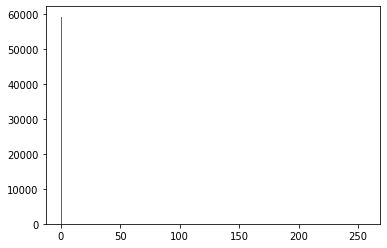

In [ ]:
# histogram try for one image
one_file = os.listdir(DCT_LOC)
one_file.sort()
one_file = one_file[0]
print(one_file)
img_1 = cv2.imread(DCT_LOC + '/' + one_file, 0) 
plt.hist(img_1.ravel(),256,[0,256])
plt.show()

In [ ]:
def compute_hist(x,bins=256):
  h_arr = np.histogram(x,bins=bins)[0]
  return h_arr/np.linalg.norm(h_arr)

def hist_blocks(test_image,bins=256,windowsize_r=32,windowsize_c=32, stride_factor=1):
 
# Define the window size
  #windowsize_r = 32
  #windowsize_c = 32

  hist_array = []
# Crop out the window and calculate the histogram
  for r in range(0,test_image.shape[0], int(windowsize_r/stride_factor)):
    for c in range(0,test_image.shape[1], int(windowsize_c/stride_factor)):              #test_image.shape[0] -> [0] accounts for dimension in x axis, [1] for y axis
      window = test_image[r:r+windowsize_r,c:c+windowsize_c]
      #hist = np.histogram(window,bins=range(0,260,4))[0]
      hist = compute_hist(window,bins=bins)
      hist_array.append(hist)
  
  return np.array(hist_array).reshape(-1)

(16384,)
[0.60721314 0.04309255 0.00783501 ... 0.00170169 0.00255253 0.19229064]


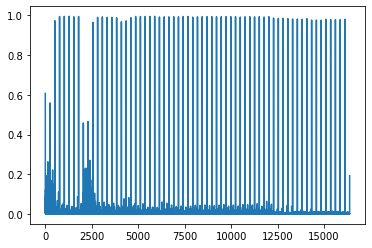

In [ ]:
one_file = os.listdir(DCT_LOC)
one_file = min(one_file)
image_for_hist = Image.open(DCT_LOC + '/' + one_file)
image_array = np.asarray(image_for_hist)

res_hist = hist_blocks(image_array)
print(res_hist.shape)

print(res_hist)
plt.plot(res_hist)

In [ ]:
def extract_runner(bin_width, group_row, group_col, _start, _stop, r_win, c_win,sf):
  files = os.listdir(DCT_LOC)
  files.sort()
  meta_dic = {"Id": [], "array": []}
  for counter, name in enumerate(islice(files, _start, _stop), _start):
    meta_dic["Id"].append(name)
  #feature_set = []
  for counter, name in tqdm(enumerate(islice(files, _start, _stop), _start)):
    img_hist = Image.open(DCT_LOC + '/' + name)
    img_array = np.asarray(img_hist)

    res = hist_blocks(img_array, windowsize_c=c_win, windowsize_r=r_win, stride_factor=sf)
    #res2 =list(res)
    #feature_set.append(res)
    meta_dic["array"].append(res)
  return meta_dic

In [ ]:
feature_1 = extract_runner(0, 0, 0, 0, 4095, 64, 64,1)

print(len(feature_1))

#ETF: 45 mins 10868

4095it [03:57, 17.24it/s] 

2


<function matplotlib.pyplot.show>

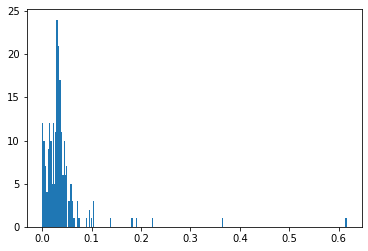

In [ ]:
len(feature_1['array'][0])

yyy = []
xxx = []
for i in range(256):
  yyy.append(feature_1['array'][0][i])
  xxx.append(i)

plt.hist(yyy, bins=256)
plt.show

In [ ]:
labels = pd.read_csv(TRAIN_LABEL)

In [ ]:
sorted_labels = labels.sort_values(by=["Id"], ascending = True)
sorted_labels

,Id,Class
1541,01IsoiSMh5gxyDYTl4CB,2
0,01kcPWA9K2BOxQeS5Rju,1
1542,02JqQ7H3yEoD8viYWlmS,2
1543,02K5GMYITj7bBoAisEmD,2
1544,02MRILoE6rNhmt7FUi45,2
...,...,...
3974,kjHCv9qNRiPUIWzdGnuY,2
3988,kmf3FnduMt5Re2NZTpLG,2
4010,kqvJp5E0wbWgu9mnzSQB,2
4015,ksKnqcBVTC0a3zSGoveR,2


In [ ]:
train_feature = pd.DataFrame(feature_1)
tf2 = pd.DataFrame(train_feature['array'].to_list())  #ETF: 3min
tf3 = pd.concat([train_feature, tf2], axis=1)
tf_final = tf3.drop(columns=['array'])

In [ ]:
tf_use = tf_final.drop(columns=['Id'])
label_use = sorted_labels.drop(columns=['Id'])

In [ ]:
import pandas as pd
import sklearn as sk

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(tf_use, label_use, test_size=0.2, random_state=47)

In [ ]:
print(X_train.shape, y_train.shape)

(3276, 4096) (3276, 1)


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = sk.ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(sk.metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.38      0.14      0.21       308
           2       0.61      0.86      0.71       500
           3       0.00      0.00      0.00        11

    accuracy                           0.58       819
   macro avg       0.33      0.33      0.31       819
weighted avg       0.51      0.58      0.51       819



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[08:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.529589


In [ ]:
csvfile = open('trainLabels.csv', 'r').readlines()
filename = 2
for i in range(len(csvfile)):
  if i % 4096 == 0:
    open(str(filename) + '.csv', 'w+').writelines(csvfile[i:i+4096])
    filename += 1

ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6105006105006106
